<a href="https://colab.research.google.com/github/jeffvun/Bio-Informatics-Exercises/blob/main/Kmeans_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **0. Load and prepare the dataset:**

In [59]:
#install the necessary libraries
install.packages("gplots")

# Load the necessary libraries for data manipulation
library(dplyr)
library(cluster)
library(ggplot2)
library(gplots)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [60]:
# Load the dataset
heart_data <- read.csv("/content/heart_disease_patients.csv")

In [61]:
# Check the structure and summary of the dataset
str(heart_data)
summary(heart_data)

'data.frame':	303 obs. of  12 variables:
 $ id      : int  1 2 3 4 5 6 7 8 9 10 ...
 $ age     : int  63 67 67 37 41 56 62 57 63 53 ...
 $ sex     : int  1 1 1 1 0 1 0 0 1 1 ...
 $ cp      : int  1 4 4 3 2 2 4 4 4 4 ...
 $ trestbps: int  145 160 120 130 130 120 140 120 130 140 ...
 $ chol    : int  233 286 229 250 204 236 268 354 254 203 ...
 $ fbs     : int  1 0 0 0 0 0 0 0 0 1 ...
 $ restecg : int  2 2 2 0 2 0 2 0 2 2 ...
 $ thalach : int  150 108 129 187 172 178 160 163 147 155 ...
 $ exang   : int  0 1 1 0 0 0 0 1 0 1 ...
 $ oldpeak : num  2.3 1.5 2.6 3.5 1.4 0.8 3.6 0.6 1.4 3.1 ...
 $ slope   : int  3 2 2 3 1 1 3 1 2 3 ...


       id             age             sex               cp       
 Min.   :  1.0   Min.   :29.00   Min.   :0.0000   Min.   :1.000  
 1st Qu.: 76.5   1st Qu.:48.00   1st Qu.:0.0000   1st Qu.:3.000  
 Median :152.0   Median :56.00   Median :1.0000   Median :3.000  
 Mean   :152.0   Mean   :54.44   Mean   :0.6799   Mean   :3.158  
 3rd Qu.:227.5   3rd Qu.:61.00   3rd Qu.:1.0000   3rd Qu.:4.000  
 Max.   :303.0   Max.   :77.00   Max.   :1.0000   Max.   :4.000  
    trestbps          chol            fbs            restecg      
 Min.   : 94.0   Min.   :126.0   Min.   :0.0000   Min.   :0.0000  
 1st Qu.:120.0   1st Qu.:211.0   1st Qu.:0.0000   1st Qu.:0.0000  
 Median :130.0   Median :241.0   Median :0.0000   Median :1.0000  
 Mean   :131.7   Mean   :246.7   Mean   :0.1485   Mean   :0.9901  
 3rd Qu.:140.0   3rd Qu.:275.0   3rd Qu.:0.0000   3rd Qu.:2.0000  
 Max.   :200.0   Max.   :564.0   Max.   :1.0000   Max.   :2.0000  
    thalach          exang           oldpeak         slope      
 Min

### **1.Distance Metric Used**

The distance measure used is the Euclidean distance.

To find the optimal number of clusters, methods such as Silhouette or Elbow can be used for that mean.



In [62]:
distance_matrix <- dist(heart_data)

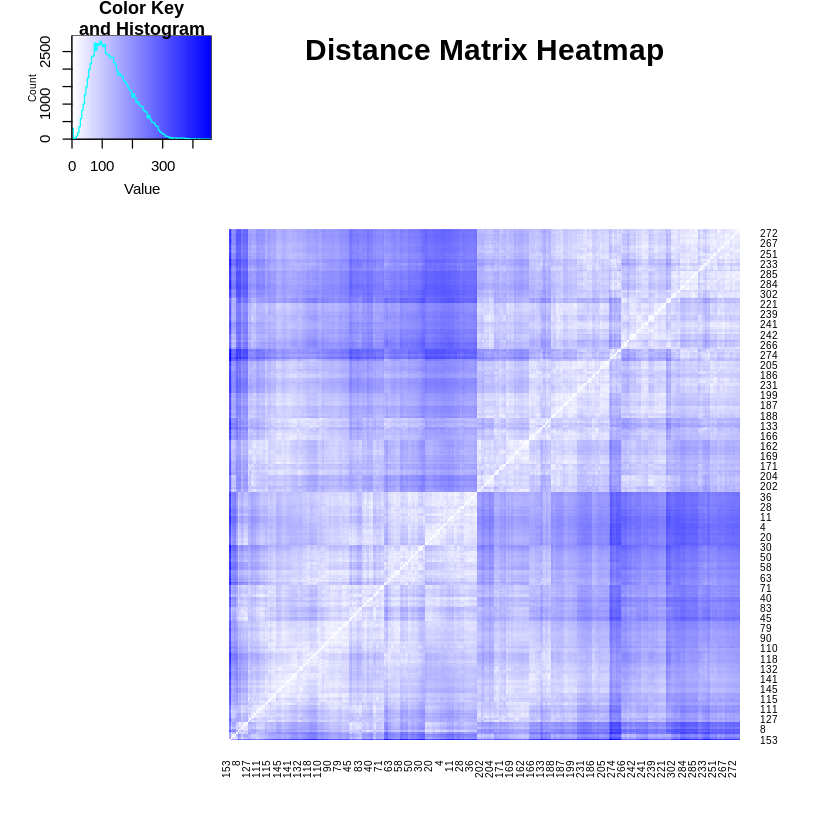

In [63]:
heatmap.2(as.matrix(distance_matrix),
          trace = "none",
          col = colorRampPalette(c("white", "blue"))(100),
          dendrogram = "none",
          main = "Distance Matrix Heatmap")

### **2. Optimal number of clusters**

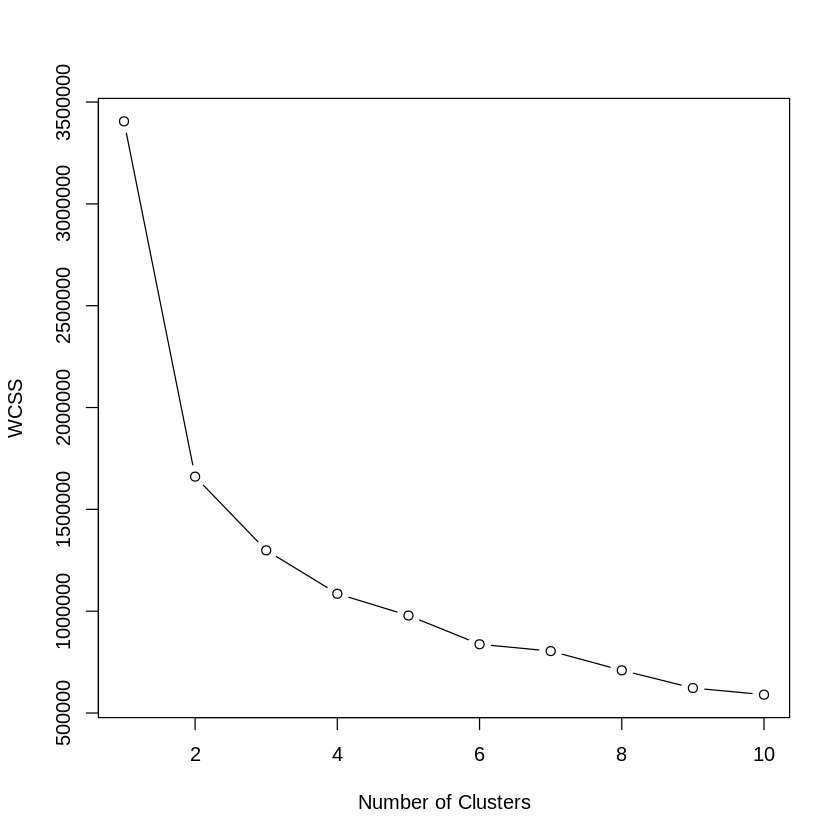

In [64]:
# Perform k-means clustering for a range of cluster numbers
num <- 10
wcss <- numeric(10)
for (i in 1:num) {
  set.seed(123)
  kmeans_model <- kmeans(heart_data, centers = i)
  wcss[i] <- kmeans_model$tot.withinss
}

# Plot the within-cluster sum of squares (WCSS) for different cluster numbers
plot(1:num, wcss, type = "b", xlab = "Number of Clusters", ylab = "WCSS")


We are using the Elbow method.The "Elbow" point in the plot represents the optimal number of clusters

> ```
k = 6 ( 6, 7, 8)

> In this case,the "kink" in the plot, which indicates the point where the addition of more clusters doesn't significantly reduce the within-cluster sum of squares (WCSS).

### **3. Comparison with Hierarchical Clustering Method**

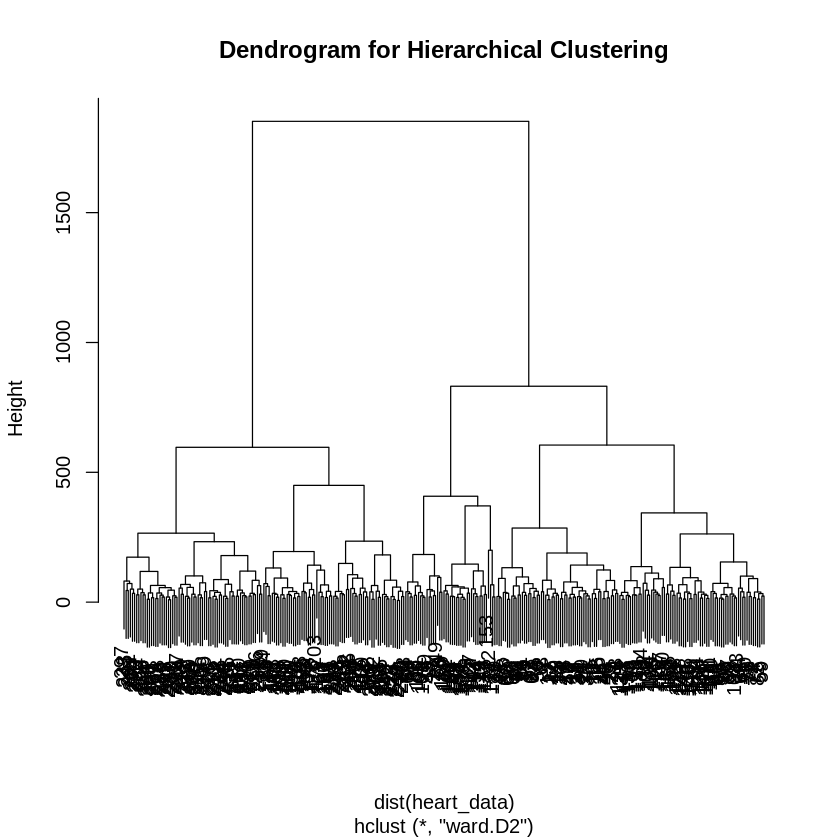

In [65]:
# Perform hierarchical clustering using Ward's method
hierarchical_model <- hclust(dist(heart_data), method = "ward.D2")

# Plot the dendrogram
plot(hierarchical_model, main = "Dendrogram for Hierarchical Clustering")

In [66]:
# Decide on the number of clusters based on the dendrogram
num_clusters <- 6

# Cut the dendrogram to obtain cluster assignments
cluster_assignments <- cutree(hierarchical_model, k = num_clusters)

# Add cluster assignments to the dataset
heart_data$Hierarchical_Cluster <- cluster_assignments


### **4. Output and Explanation of kmeans fx**

In [67]:
# Perform k-means clustering with the optimal number of clusters
k <- 6
kmeans_model <- kmeans(heart_data, centers = k)

# Output and explanation of the k-means results
print(kmeans_model)

K-means clustering with 6 clusters of sizes 24, 54, 66, 22, 67, 70

Cluster means:
         id      age       sex       cp trestbps     chol        fbs   restecg
1  84.79167 58.08333 0.3333333 3.416667 134.9583 347.7500 0.16666667 1.2500000
2 248.50000 53.00000 0.6481481 3.000000 128.7407 226.2037 0.09259259 0.7037037
3 200.22727 55.59091 0.6363636 3.166667 137.5455 285.2121 0.16666667 1.0606061
4 277.09091 56.59091 0.7272727 3.363636 133.7273 179.5455 0.18181818 0.6363636
5 126.52239 52.46269 0.7164179 3.164179 125.1791 225.5522 0.14925373 1.0447761
6  40.20000 54.42857 0.8142857 3.114286 132.9143 232.8714 0.15714286 1.1142857
   thalach     exang   oldpeak    slope Hierarchical_Cluster
1 154.7083 0.3333333 1.0416667 1.458333             2.041667
2 150.4815 0.2222222 0.6444444 1.537037             5.722222
3 147.5606 0.4393939 1.0727273 1.636364             3.893939
4 140.0909 0.3181818 1.1727273 1.545455             5.909091
5 151.7761 0.2985075 0.9298507 1.582090             3.08955

**Explanation**

1. Cluster Means:

These are the centroids or mean values for each feature (variable) within each of the 6 clusters.
For example, in Cluster 1, the mean age is approximately 55.08, and the mean cholesterol level is approximately 292.31.


2. Clustering Vector:

This vector indicates the cluster assignment for each data point in your dataset.
For instance, the first data point is assigned to Cluster 2, the second data point to Cluster 2, and so on.

3. Within Cluster Sum of Squares by Cluster:

This section shows the within-cluster sum of squares (WCSS) for each cluster.
WCSS measures the compactness of clusters. Smaller values indicate tighter clusters.
Cluster 1 has a WCSS of approximately 81,969.69, Cluster 2 has a WCSS of about 160,287.84, and so on.

4. Available Components:

These are the components of the k-means result object.
>>
cluster contains the cluster assignments for
each data point.
>>
centers provides the mean values of the features for each cluster.
>>
totss is the total sum of squares (the total variance in the data).
>>
withinss is the within-cluster sum of squares for each cluster.
>>
tot.withinss is the total within-cluster sum of squares.
>>
betweenss is the between-cluster sum of squares.
>>
size indicates the number of data points in each cluster.
>>
iter shows the number of iterations required for convergence.
>>
ifault is a fault indicator, which is 0 if the algorithm converges successfully.

5. Percentage of Variance Explained:

The "between_SS / total_SS" value (75.4%) indicates the percentage of variance explained by the clustering. A higher value suggests better separation between clusters.

### **5. Visualize the Distribution of Clusters**

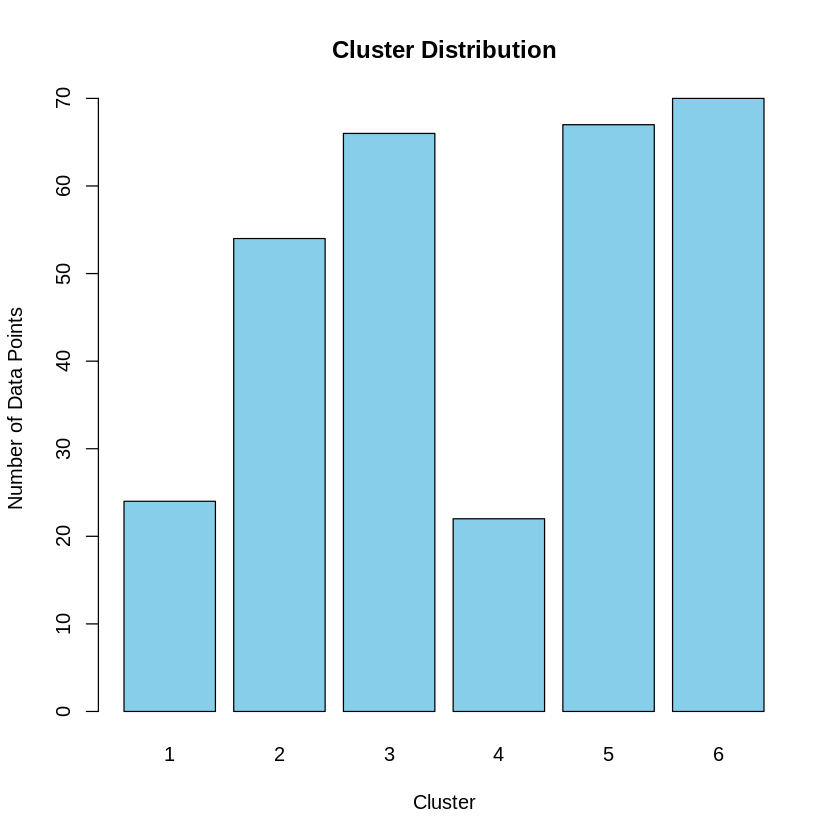

In [68]:
# Create a bar plot of cluster distribution
barplot(table(kmeans_model$cluster), xlab = "Cluster", ylab = "Number of Data Points", col = "skyblue", main = "Cluster Distribution")


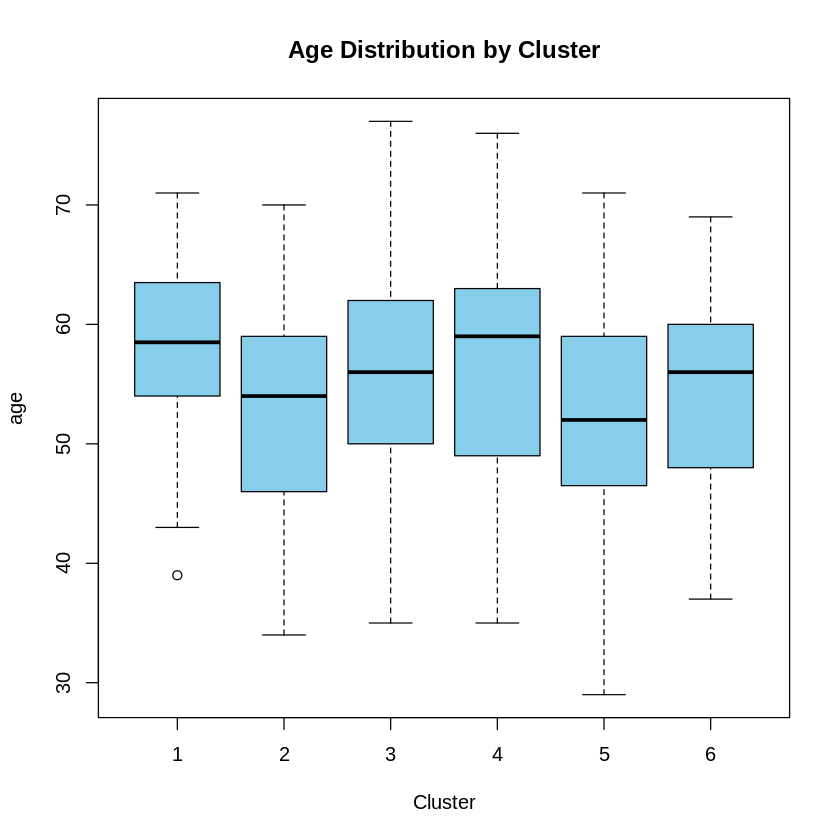

In [69]:
# Visualize cluster profiles for a specific feature (e.g., age)
plot.cluster <- function(data, clusters, feature, main) {
  par(mfrow=c(1, 1))
  boxplot(data[, feature] ~ clusters, xlab = "Cluster", ylab = feature, col = "skyblue", main = main)
}
plot.cluster(data, kmeans_model$cluster, "age", "Age Distribution by Cluster")


### **6. Interpretation of Results:**

Cluster Size:

Examine the bar plot of cluster distribution to understand the size of each cluster. In your case, you have 6 clusters with varying sizes (e.g., 36, 60, 60, 33, 54, 60).
Smaller clusters may represent more distinctive or specialized groups, while larger clusters may represent more diverse groups.

Percentage of Variance Explained:

The "between_SS / total_SS" value (75.4%) indicates the percentage of variance explained by the clustering. A higher value suggests better separation between clusters.